# Cars data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars=pd.read_csv("cars.csv")
cars.head(10)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
5,2,?,audi,gas,sedan,fwd,front,66.3,53.1,ohc,136,110,19,25,15250
6,1,158,audi,gas,sedan,fwd,front,71.4,55.7,ohc,136,110,19,25,17710
7,1,?,audi,gas,wagon,fwd,front,71.4,55.7,ohc,136,110,19,25,18920
8,1,158,audi,gas,sedan,fwd,front,71.4,55.9,ohc,131,140,17,20,23875
9,0,?,audi,gas,hatchback,4wd,front,67.9,52.0,ohc,131,160,16,22,12000


In [3]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [4]:
cars.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [5]:
cars['normalized-losses'].loc[cars['normalized-losses']=='?'].count()

41

In [6]:
#for col in cars.columns:
     #if cars[col]=='?':
        #print([cars[col]=='?'].count())

In [7]:
cars['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [9]:
cars.shape

(205, 15)

In [10]:
cars['price'].loc[cars['price']=='?'].count()

0

In [11]:
cars.price.value_counts()

8921     2
18150    2
8845     2
7609     2
6692     2
        ..
40960    1
45400    1
16503    1
5389     1
22625    1
Name: price, Length: 189, dtype: int64

## 1. Handle the Missing values

In [12]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
cars = cars.replace('?',np.NAN)

In [14]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<AxesSubplot: >

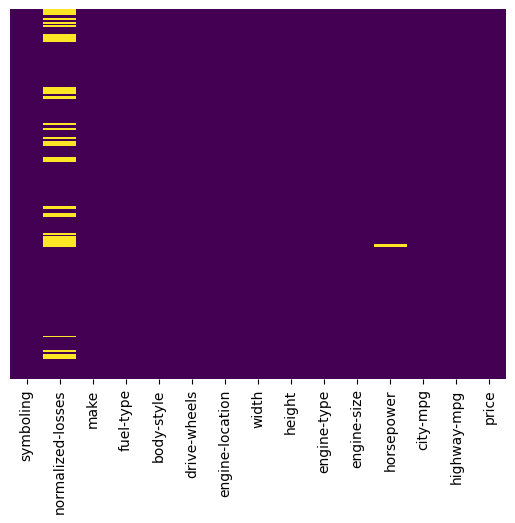

In [15]:
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [17]:
cars['normalized-losses']=pd.to_numeric(cars['normalized-losses'])

In [18]:
cars['normalized-losses'].mean()

122.0

In [19]:
cars['normalized-losses'].fillna(cars['normalized-losses'].mean(),inplace=True)

In [20]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [21]:
cars['horsepower']=pd.to_numeric(cars['horsepower'])
cars['horsepower'].fillna(cars['horsepower'].mean(),inplace=True)

In [22]:
cars['horsepower'].unique()

array([111.        , 154.        , 102.        , 115.        ,
       110.        , 140.        , 160.        , 101.        ,
       121.        , 182.        ,  48.        ,  70.        ,
        68.        ,  88.        , 145.        ,  58.        ,
        76.        ,  60.        ,  86.        , 100.        ,
        78.        ,  90.        , 176.        , 262.        ,
       135.        ,  84.        ,  64.        , 120.        ,
        72.        , 123.        , 155.        , 184.        ,
       175.        , 116.        ,  69.        ,  55.        ,
        97.        , 152.        , 200.        ,  95.        ,
       142.        , 143.        , 207.        , 288.        ,
       104.25615764,  73.        ,  82.        ,  94.        ,
        62.        ,  56.        , 112.        ,  92.        ,
       161.        , 156.        ,  52.        ,  85.        ,
       114.        , 162.        , 134.        , 106.        ])

In [23]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


<AxesSubplot: >

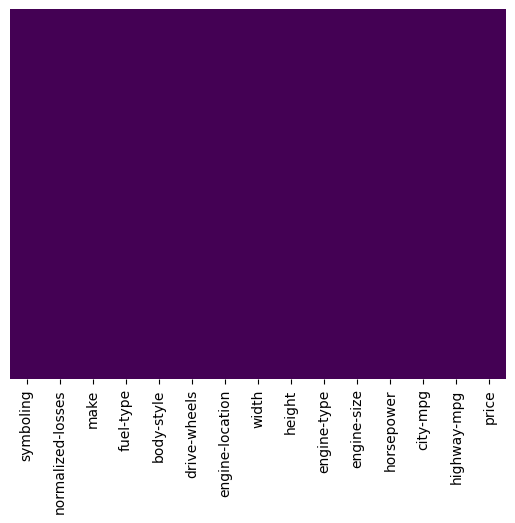

In [25]:
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


## 2. Remove all the outliers if exists in the dataset

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


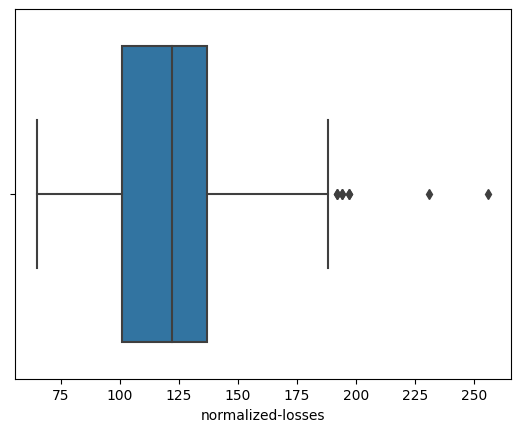

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


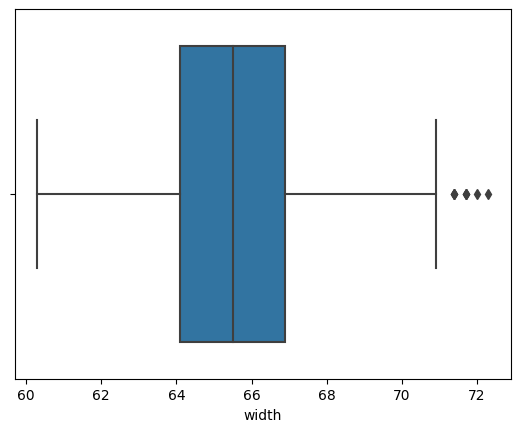

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


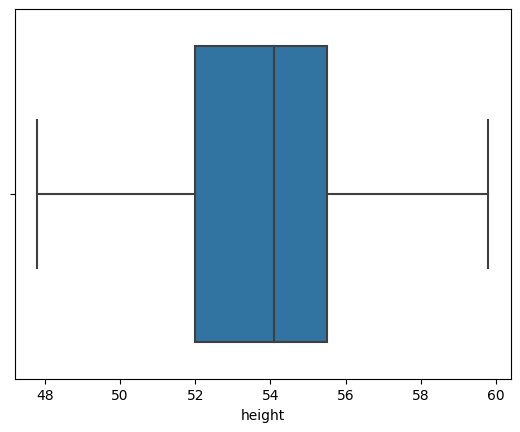

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


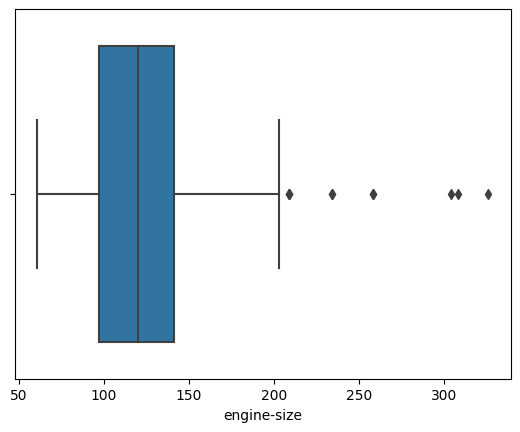

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


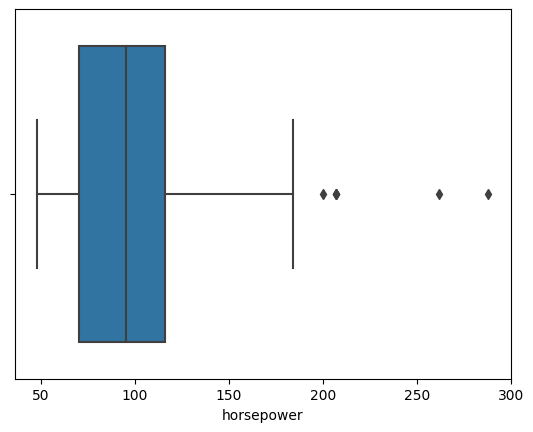

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


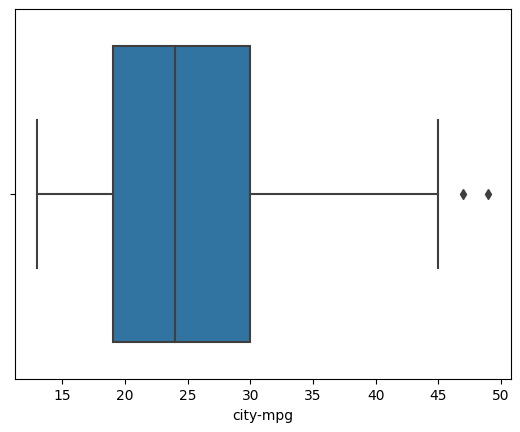

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


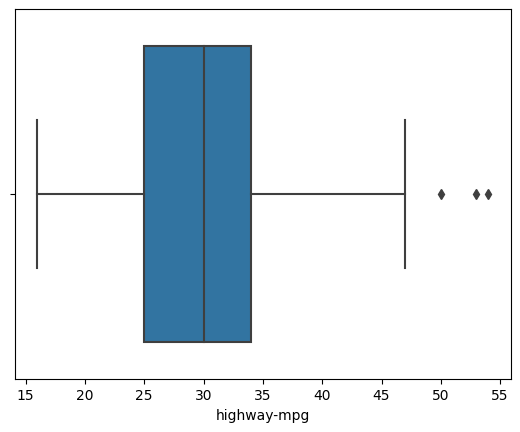

D:\Softwares\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


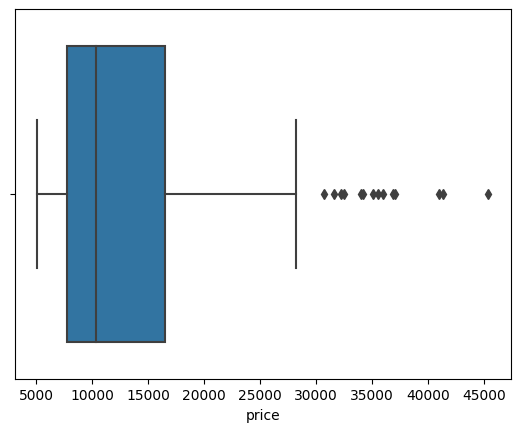

In [27]:
num=['normalized-losses','width','height','engine-size','horsepower','city-mpg','highway-mpg','price']
for col in num:
    sns.boxplot(cars[col])
    plt.show()

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


<AxesSubplot: xlabel='engine-size'>

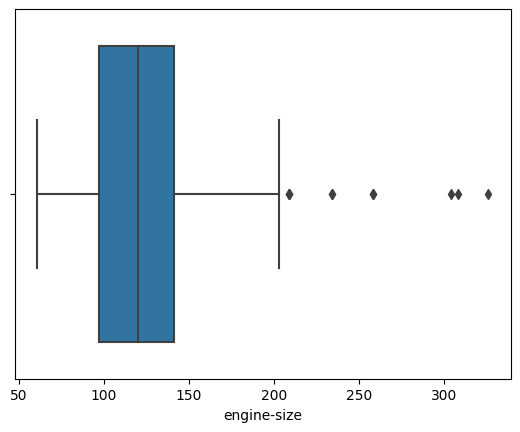

In [29]:
sns.boxplot(data=cars,x=cars['engine-size'])

In [30]:
Q1=cars['engine-size'].quantile(0.25)
Q3=cars['engine-size'].quantile(0.75)
print("My 1st Quartile is:", Q1)
print("My 3rd Quartile is:", Q3)

My 1st Quartile is: 97.0
My 3rd Quartile is: 141.0


In [31]:
IQR=Q3-Q1
IQR

44.0

In [32]:
Lower_whisker=Q1-1.5*IQR
Upper_whisker=Q3+1.5*IQR
print(Lower_whisker,Upper_whisker)

31.0 207.0


In [33]:
cars1=cars[cars['engine-size']<Upper_whisker]

<AxesSubplot: xlabel='engine-size'>

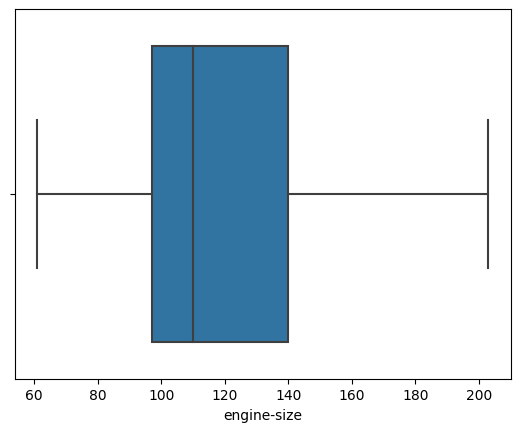

In [34]:
sns.boxplot(data=cars1,x=cars1['engine-size'])

<AxesSubplot: xlabel='horsepower'>

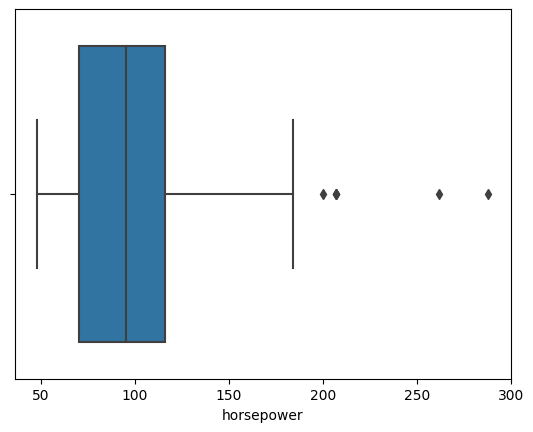

In [35]:
sns.boxplot(data=cars,x=cars['horsepower'])

In [36]:
Q1=cars['horsepower'].quantile(0.25)
Q3=cars['horsepower'].quantile(0.75)
print("My 1st Quartile is:", Q1)
print("My 3rd Quartile is:", Q3)

My 1st Quartile is: 70.0
My 3rd Quartile is: 116.0


In [37]:
IQR=Q3-Q1
IQR

46.0

In [38]:
Lower_whisker=Q1-1.5*IQR
Upper_whisker=Q3+1.5*IQR
print(Lower_whisker,Upper_whisker)

1.0 185.0


In [39]:
cars1=cars[cars['horsepower']<Upper_whisker]

<AxesSubplot: xlabel='horsepower'>

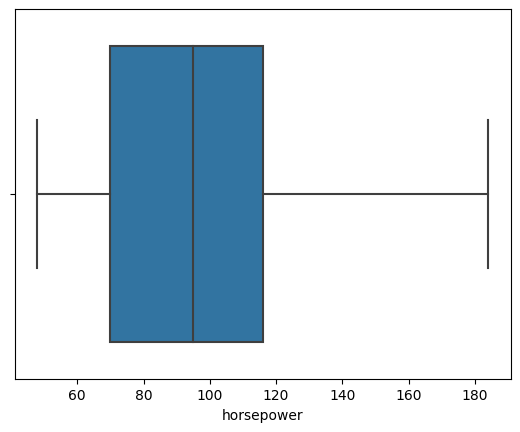

In [40]:
sns.boxplot(data=cars1,x=cars1['horsepower'])

<AxesSubplot: xlabel='price'>

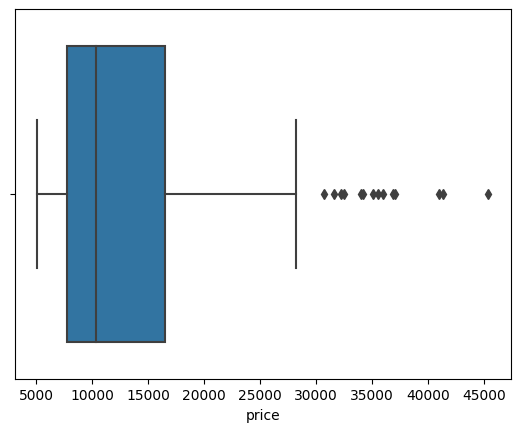

In [41]:
sns.boxplot(data=cars,x=cars['price'])

In [42]:
Q1=cars['price'].quantile(0.25)
Q3=cars['price'].quantile(0.75)
print("My 1st Quartile is:", Q1)
print("My 3rd Quartile is:", Q3)

My 1st Quartile is: 7788.0
My 3rd Quartile is: 16500.0


In [43]:
IQR=Q3-Q1
IQR

8712.0

In [44]:
Lower_whisker=Q1-1.5*IQR
Upper_whisker=Q3+1.5*IQR
print(Lower_whisker,Upper_whisker)

-5280.0 29568.0


In [45]:
cars1=cars[cars['price']<Upper_whisker]

In [46]:
cars1.shape

(191, 15)

<AxesSubplot: xlabel='price'>

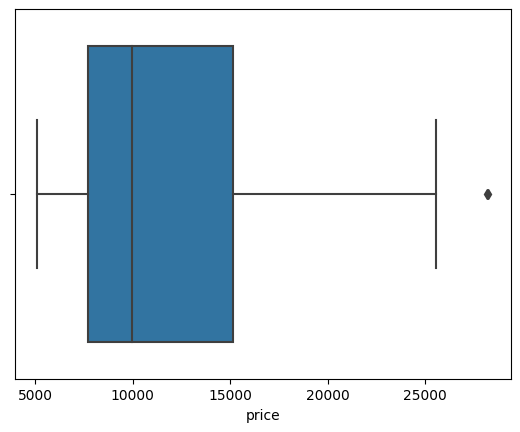

In [47]:
sns.boxplot(data=cars1,x=cars1['price'])

In [48]:
cars.shape

(205, 15)

In [49]:
cars1.shape

(191, 15)

### 3. Use Encoding and encode all the categorical data

In [50]:
cars1_num =cars1.select_dtypes(["int64","float64"])

In [51]:
cars1_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [52]:
cars1_cat =cars1.select_dtypes(object)

In [53]:
cars1_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [54]:
cars1_cat['fuel-type'].value_counts()

gas       172
diesel     19
Name: fuel-type, dtype: int64

In [55]:
cars1_cat['body-style'].value_counts()

sedan          87
hatchback      70
wagon          25
hardtop         5
convertible     4
Name: body-style, dtype: int64

In [56]:
cars1_cat['drive-wheels'].value_counts()

fwd    120
rwd     62
4wd      9
Name: drive-wheels, dtype: int64

In [57]:
cars1_cat['engine-location'].value_counts()

front    191
Name: engine-location, dtype: int64

In [58]:
cars1_cat['engine-type'].value_counts()

ohc      144
l         12
ohcf      12
dohc      10
ohcv       8
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
for col in cars1_cat:
    le=LabelEncoder()
    cars1_cat[col]= le.fit_transform(cars1_cat[col])

In [61]:
cars1_cat.head(10)

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
5,1,1,3,1,0,3
6,1,1,3,1,0,3
7,1,1,4,1,0,3
8,1,1,3,1,0,3
9,1,1,2,0,0,3


In [62]:
cars1.drop(['make','fuel-type','body-style','drive-wheels','engine-location','engine-type'],axis=1,inplace=True)

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_12336\1709624638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars1.drop(['make','fuel-type','body-style','drive-wheels','engine-location','engine-type'],axis=1,inplace=True)


In [63]:
cars1

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [64]:
cars_main=pd.concat([cars1,cars1_cat],axis=1)

In [65]:
cars_main

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845,20,1,3,2,0,3
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045,20,1,3,2,0,3
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485,20,1,3,2,0,5
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470,20,0,3,2,0,3


### 4. Handle the Skewness in dependent feature

In [66]:
cars_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   width              191 non-null    float64
 3   height             191 non-null    float64
 4   engine-size        191 non-null    int64  
 5   horsepower         191 non-null    float64
 6   city-mpg           191 non-null    int64  
 7   highway-mpg        191 non-null    int64  
 8   price              191 non-null    int64  
 9   make               191 non-null    int32  
 10  fuel-type          191 non-null    int32  
 11  body-style         191 non-null    int32  
 12  drive-wheels       191 non-null    int32  
 13  engine-location    191 non-null    int32  
 14  engine-type        191 non-null    int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 19.4 KB


D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price', ylabel='Density'>

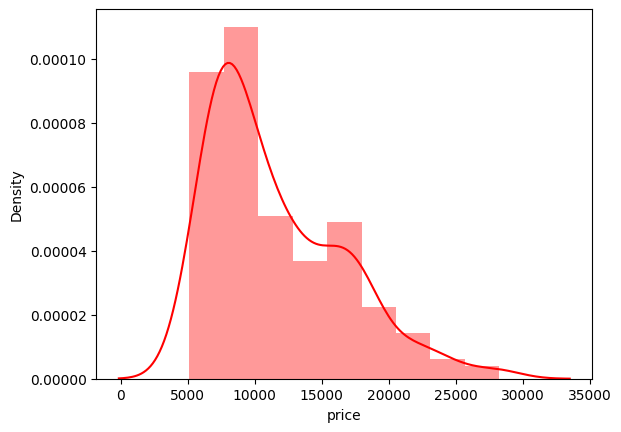

In [67]:
sns.distplot(cars_main['price'],color='r')

In [68]:
cars_main['price'].skew()

1.0176661887138065

In [69]:
print("Skew of price:%f" % cars_main['price'].skew())

Skew of price:1.017666


In [70]:
from scipy.stats import norm

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price', ylabel='Density'>

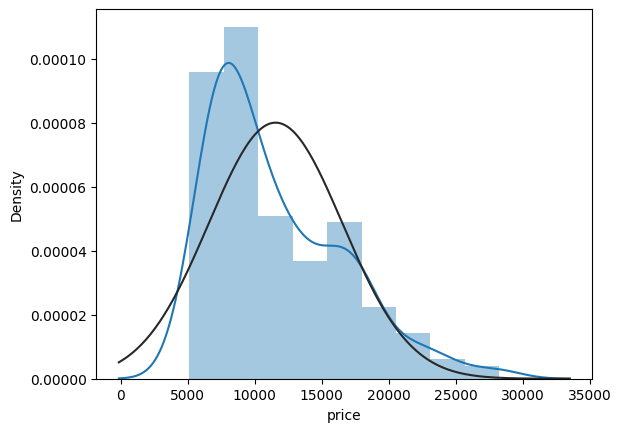

In [71]:
sns.distplot(cars_main['price'], fit=norm)

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness after 1st log transform:0.315438


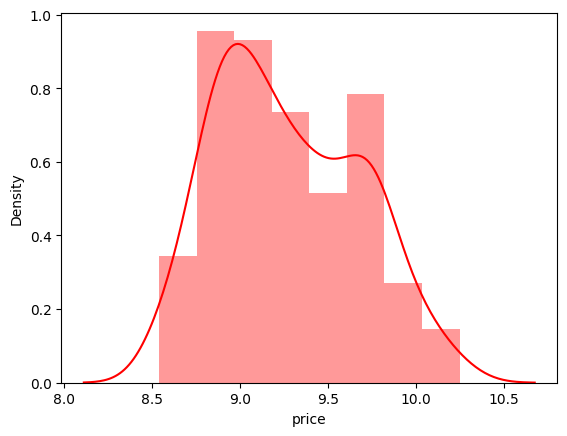

In [72]:
singleLog_y=np.log1p(cars_main['price'])
sns.distplot(singleLog_y,color='r')
print("Skewness after 1st log transform:%f" % singleLog_y.skew())

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness after 1st log transform:0.315438


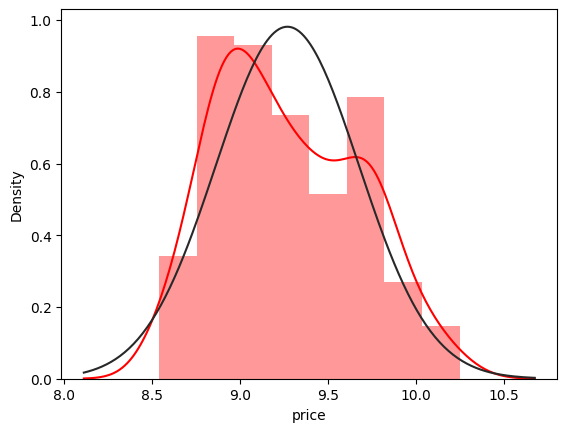

In [73]:
singleLog_y=np.log1p(cars_main['price'])
sns.distplot(singleLog_y,color='r',fit=norm)
print("Skewness after 1st log transform:%f" % singleLog_y.skew())

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness after 2nd log transform:0.252788


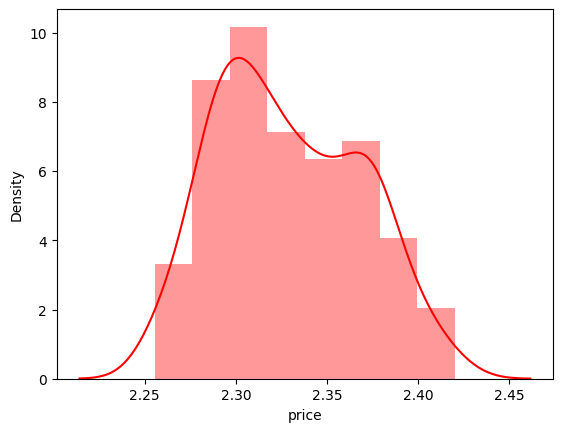

In [74]:
DoubleLog_y=np.log1p(singleLog_y)
sns.distplot(DoubleLog_y, color='r')
print("Skewness after 2nd log transform:%f" % DoubleLog_y.skew())

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness after 2nd log transform:0.252788


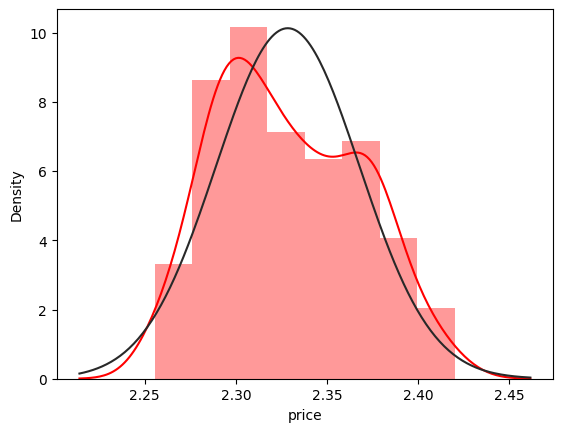

In [75]:
DoubleLog_y=np.log1p(singleLog_y)
sns.distplot(DoubleLog_y, color='r',fit=norm)
print("Skewness after 2nd log transform:%f" % DoubleLog_y.skew())

D:\Softwares\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness after 3rd log transform:0.234059


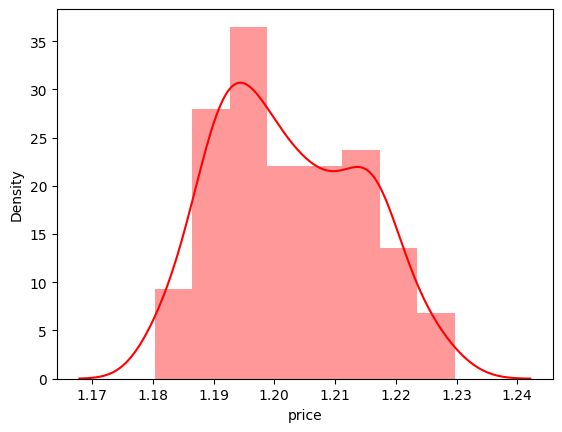

In [76]:
TripleLog_y=np.log1p(DoubleLog_y)
sns.distplot(TripleLog_y, color='r')
print("Skewness after 3rd log transform:%f" % TripleLog_y.skew())

In [77]:
cars_main[['price']].var()

price    2.497933e+07
dtype: float64

In [78]:
#cars_main['price']=cars1.price**(1/1.2)
#sns.distplot(cars_main['price'],color='r')
#print("Skewness after reciprocal transform:%f" % cars_main['price'].skew())

### 5. Perform normalization on the dataset

In [79]:
cars_main.corrwith(cars_main["price"],axis=0)

symboling           -0.133531
normalized-losses    0.207807
width                0.736681
height               0.243510
engine-size          0.706890
horsepower           0.631910
city-mpg            -0.620863
highway-mpg         -0.642586
price                1.000000
make                -0.055942
fuel-type           -0.229887
body-style           0.094562
drive-wheels         0.548741
engine-location           NaN
engine-type         -0.078763
dtype: float64

Text(0.5, 1.0, 'horsepower feature effect on price')

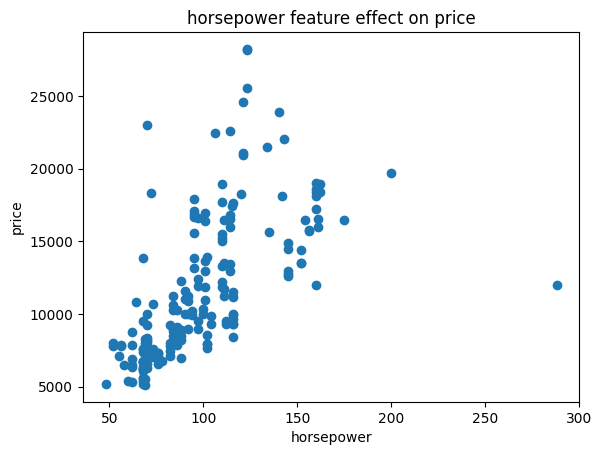

In [80]:
plt.scatter(cars_main['horsepower'],cars_main['price'])
plt.xlabel("horsepower")
plt.ylabel("price")
plt.title("horsepower feature effect on price")

Text(0.5, 1.0, 'engine-size feature effect on price')

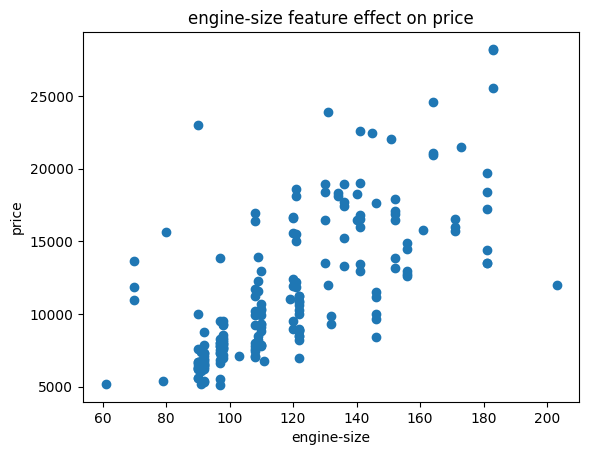

In [81]:
plt.scatter(cars_main['engine-size'],cars_main['price'])
plt.xlabel("engine-size")
plt.ylabel("price")
plt.title("engine-size feature effect on price")

Text(0.5, 1.0, 'drive-wheels feature effect on price')

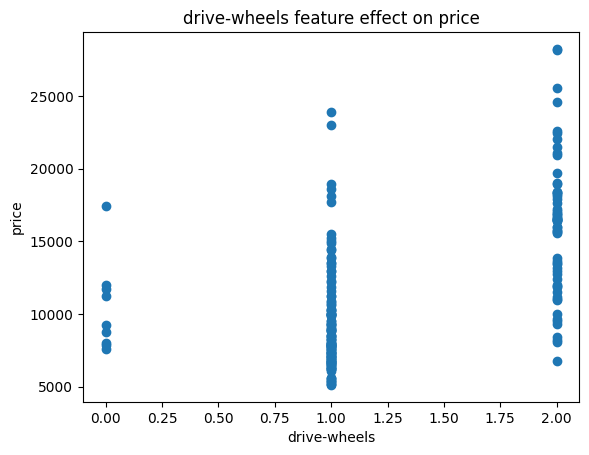

In [82]:
plt.scatter(cars_main['drive-wheels'],cars_main['price'])
plt.xlabel("drive-wheels")
plt.ylabel("price")
plt.title("drive-wheels feature effect on price")

Text(0.5, 1.0, 'height feature effect on price')

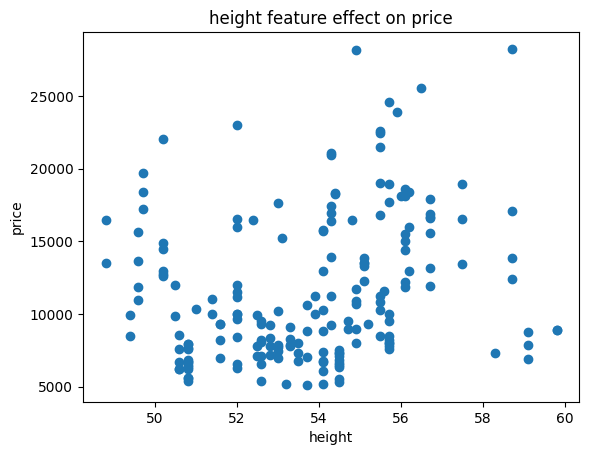

In [83]:
plt.scatter(cars_main['height'],cars_main['price'])
plt.xlabel("height")
plt.ylabel("price")
plt.title("height feature effect on price")

Text(0.5, 1.0, 'width feature effect on price')

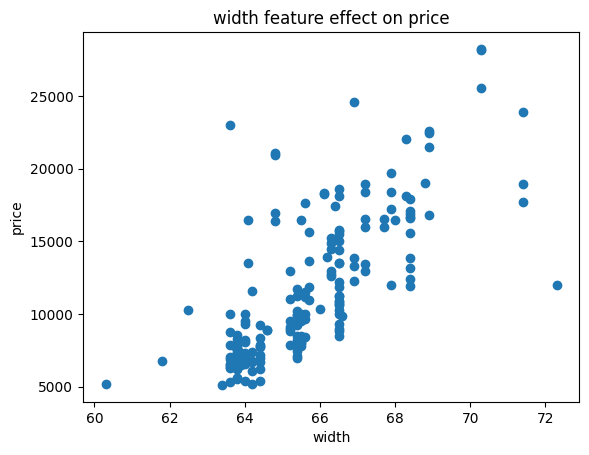

In [84]:
plt.scatter(cars_main['width'],cars_main['price'])
plt.xlabel("width")
plt.ylabel("price")
plt.title("width feature effect on price")

In [85]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
cols = ['width', 'engine-size', 'horsepower', 'drive-wheels', 'height']
cars_main[cols] = mmscaler.fit_transform(cars_main[cols])

In [86]:
cars_main

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,0.316667,0.000000,0.485915,0.262500,21,27,13495,0,1,0,1.0,0,0
1,3,122.0,0.316667,0.000000,0.485915,0.262500,21,27,16500,0,1,0,1.0,0,0
2,1,122.0,0.433333,0.327273,0.640845,0.441667,19,26,16500,0,1,2,1.0,0,5
3,2,164.0,0.491667,0.500000,0.338028,0.225000,24,30,13950,1,1,3,0.5,0,3
4,2,164.0,0.508333,0.500000,0.528169,0.279167,18,22,17450,1,1,3,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0.716667,0.609091,0.563380,0.275000,23,28,16845,20,1,3,1.0,0,3
201,-1,95.0,0.708333,0.609091,0.563380,0.466667,19,25,19045,20,1,3,1.0,0,3
202,-1,95.0,0.716667,0.609091,0.788732,0.358333,18,23,21485,20,1,3,1.0,0,5
203,-1,95.0,0.716667,0.609091,0.591549,0.241667,26,27,22470,20,0,3,1.0,0,3


In [87]:
cars_main[['width', 'engine-size', 'horsepower', 'drive-wheels', 'height']].var()

width           0.025129
engine-size     0.037434
horsepower      0.019080
drive-wheels    0.074070
height          0.048829
dtype: float64

In [88]:
cars_main[['width', 'engine-size', 'horsepower', 'drive-wheels', 'height']].mean().round(3)

width           0.448
engine-size     0.407
horsepower      0.210
drive-wheels    0.639
height          0.449
dtype: float64

(array([ 1.,  0.,  1.,  1.,  0., 39., 27.,  6., 36.,  8., 31., 10.,  7.,
        12.,  5.,  0.,  3.,  0.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

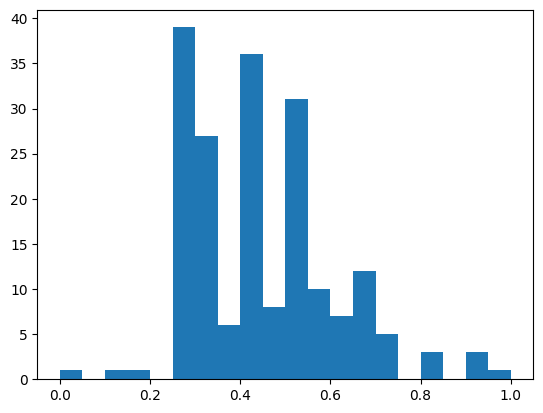

In [89]:
plt.hist(cars_main['width'],bins=20)

(array([ 1.,  3.,  2.,  0., 32., 29., 33.,  1., 29.,  6.,  9., 16.,  7.,
         5.,  4.,  4.,  6.,  3.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

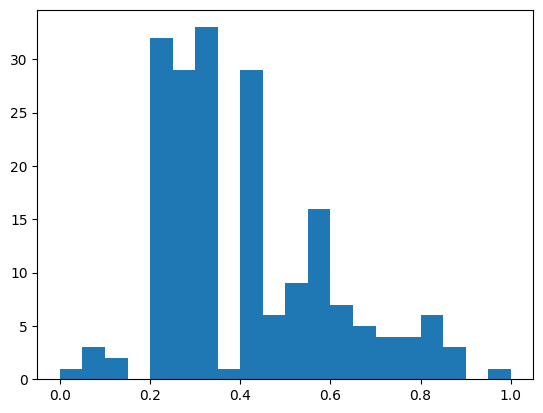

In [90]:
plt.hist(cars_main['engine-size'],bins=20)

(array([ 8., 48., 19., 29., 21., 31.,  6.,  5.,  9., 12.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

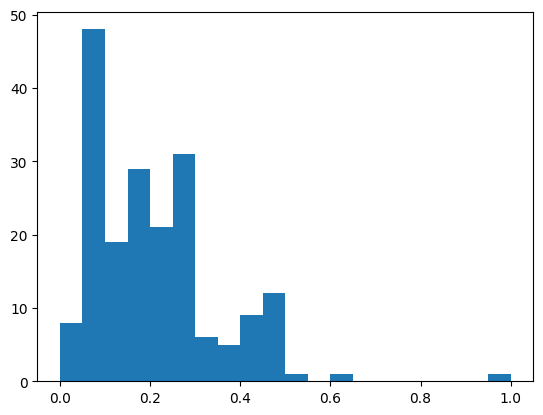

In [91]:
plt.hist(cars_main['horsepower'],bins=20)

(array([  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

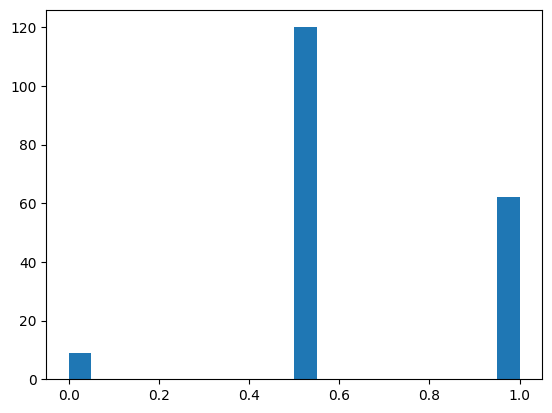

In [92]:
plt.hist(cars_main['drive-wheels'],bins=20)

(array([ 2.,  9.,  6., 20.,  3., 16., 11., 11., 12., 12., 23., 12., 22.,
        11.,  8.,  3.,  0.,  1.,  7.,  2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

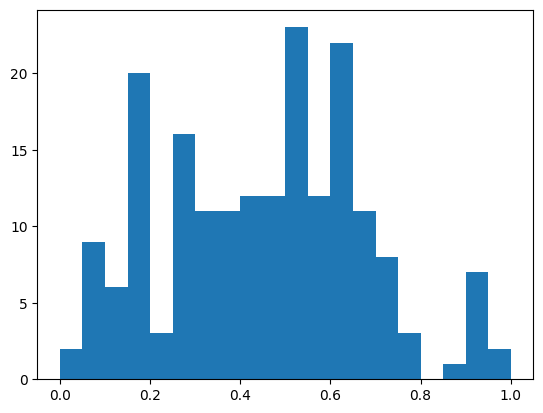

In [93]:
plt.hist(cars_main['height'],bins=20)

### From histogram clearly understand, all this features are normally distributed

# Our data is prepared to do machine learning algorithm

In [94]:
cars_main

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,0.316667,0.000000,0.485915,0.262500,21,27,13495,0,1,0,1.0,0,0
1,3,122.0,0.316667,0.000000,0.485915,0.262500,21,27,16500,0,1,0,1.0,0,0
2,1,122.0,0.433333,0.327273,0.640845,0.441667,19,26,16500,0,1,2,1.0,0,5
3,2,164.0,0.491667,0.500000,0.338028,0.225000,24,30,13950,1,1,3,0.5,0,3
4,2,164.0,0.508333,0.500000,0.528169,0.279167,18,22,17450,1,1,3,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0.716667,0.609091,0.563380,0.275000,23,28,16845,20,1,3,1.0,0,3
201,-1,95.0,0.708333,0.609091,0.563380,0.466667,19,25,19045,20,1,3,1.0,0,3
202,-1,95.0,0.716667,0.609091,0.788732,0.358333,18,23,21485,20,1,3,1.0,0,5
203,-1,95.0,0.716667,0.609091,0.591549,0.241667,26,27,22470,20,0,3,1.0,0,3


In [95]:
cars_main.corr(method ='pearson')

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
symboling,1.000000,0.481273,-0.200776,-0.540809,-0.120296,0.073734,-0.046881,0.017641,-0.133531,-0.178070,0.184651,-0.564948,-0.042544,NaN,0.018869
normalized-losses,0.481273,1.000000,0.097787,-0.377585,0.153735,0.241679,-0.230373,-0.188391,0.207807,-0.265696,0.088328,-0.262996,0.327747,NaN,-0.088765
width,-0.200776,0.097787,1.000000,0.305353,0.714808,0.638162,-0.609502,-0.620758,0.736681,0.107409,-0.268921,0.179689,0.415705,NaN,-0.068022
height,-0.540809,-0.377585,0.305353,1.000000,0.152016,-0.078099,-0.069743,-0.128647,0.243510,0.270560,-0.284103,0.592254,-0.014423,NaN,-0.138007
engine-size,-0.120296,0.153735,0.714808,0.152016,1.000000,0.766330,-0.614583,-0.617716,0.706890,0.085708,-0.174077,0.016494,0.480930,NaN,-0.120954
horsepower,0.073734,0.241679,0.638162,-0.078099,0.766330,1.000000,-0.781177,-0.746039,0.631910,0.035828,0.160417,-0.081122,0.439519,NaN,-0.104561
city-mpg,-0.046881,-0.230373,-0.609502,-0.069743,-0.614583,-0.781177,1.000000,0.970117,-0.620863,-0.009268,-0.258678,-0.026467,-0.372054,NaN,-0.040478
highway-mpg,0.017641,-0.188391,-0.620758,-0.128647,-0.617716,-0.746039,0.970117,1.000000,-0.642586,-0.023682,-0.193855,-0.065921,-0.373405,NaN,-0.023860
price,-0.133531,0.207807,0.736681,0.243510,0.706890,0.631910,-0.620863,-0.642586,1.000000,-0.055942,-0.229887,0.094562,0.548741,NaN,-0.078763
make,-0.178070,-0.265696,0.107409,0.270560,0.085708,0.035828,-0.009268,-0.023682,-0.055942,1.000000,-0.107313,0.125078,0.051023,NaN,-0.067808


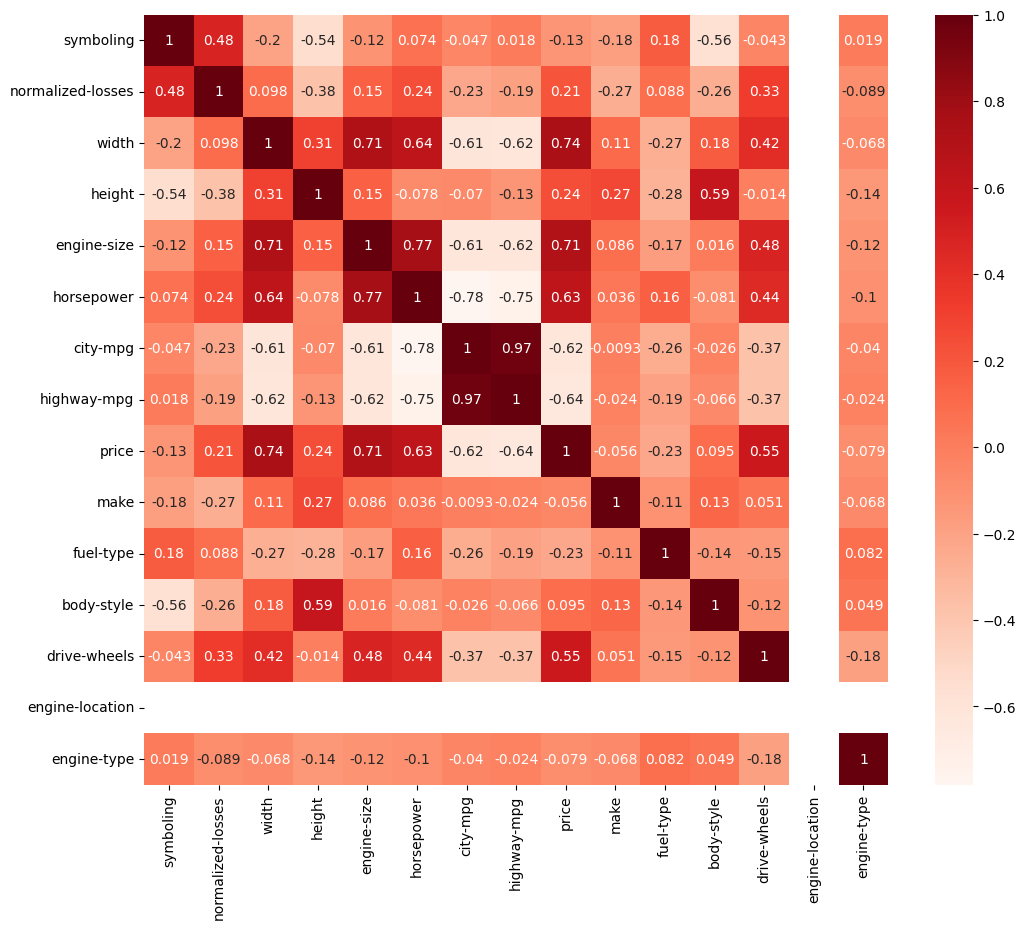

In [96]:
plt.figure(figsize=(12,10))
cor = cars_main.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [97]:
cor_target =(cor["price"])

In [98]:
cor_target

symboling           -0.133531
normalized-losses    0.207807
width                0.736681
height               0.243510
engine-size          0.706890
horsepower           0.631910
city-mpg            -0.620863
highway-mpg         -0.642586
price                1.000000
make                -0.055942
fuel-type           -0.229887
body-style           0.094562
drive-wheels         0.548741
engine-location           NaN
engine-type         -0.078763
Name: price, dtype: float64

In [99]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

width           0.736681
engine-size     0.706890
horsepower      0.631910
price           1.000000
drive-wheels    0.548741
Name: price, dtype: float64

In [100]:
cars_main=cars_main.drop('symboling',axis=1)
cars_main=cars_main.drop('normalized-losses',axis=1)
cars_main=cars_main.drop('height',axis=1)
cars_main=cars_main.drop('make',axis=1)
cars_main=cars_main.drop('fuel-type',axis=1)
cars_main=cars_main.drop('engine-location',axis=1)
cars_main=cars_main.drop('engine-type',axis=1)
cars_main=cars_main.drop('body-style',axis=1)

In [101]:
cars_main

,width,engine-size,horsepower,city-mpg,highway-mpg,price,drive-wheels
0,0.316667,0.485915,0.262500,21,27,13495,1.0
1,0.316667,0.485915,0.262500,21,27,16500,1.0
2,0.433333,0.640845,0.441667,19,26,16500,1.0
3,0.491667,0.338028,0.225000,24,30,13950,0.5
4,0.508333,0.528169,0.279167,18,22,17450,0.0
...,...,...,...,...,...,...,...
200,0.716667,0.563380,0.275000,23,28,16845,1.0
201,0.708333,0.563380,0.466667,19,25,19045,1.0
202,0.716667,0.788732,0.358333,18,23,21485,1.0
203,0.716667,0.591549,0.241667,26,27,22470,1.0


In [102]:
X=cars_main.drop(['price'],axis=1)
y=cars_main.price

In [103]:
X

,width,engine-size,horsepower,city-mpg,highway-mpg,drive-wheels
0,0.316667,0.485915,0.262500,21,27,1.0
1,0.316667,0.485915,0.262500,21,27,1.0
2,0.433333,0.640845,0.441667,19,26,1.0
3,0.491667,0.338028,0.225000,24,30,0.5
4,0.508333,0.528169,0.279167,18,22,0.0
...,...,...,...,...,...,...
200,0.716667,0.563380,0.275000,23,28,1.0
201,0.708333,0.563380,0.466667,19,25,1.0
202,0.716667,0.788732,0.358333,18,23,1.0
203,0.716667,0.591549,0.241667,26,27,1.0


In [104]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 191, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [106]:
print(X_train.shape)
print(X_test.shape)

(152, 6)
(39, 6)


In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
reg = LinearRegression()

In [109]:
reg.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred = reg.predict(X_test)

In [111]:
from sklearn.metrics import r2_score

In [112]:
r2_score(y_test,y_pred)

0.7055380422054511

In [113]:
reg.coef_

array([10525.65814166,  4766.53868646,  -180.50666255,   170.95618308,
        -328.75771573,  4596.79021565])

In [114]:
reg.intercept_

8064.273838760579